In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pickle import load

In [2]:
SCRIPTPATH = '/Users/marcosaponara/Documents/GitHub/centipede-bias/mysrc/utils/script3.py'

In [3]:
#!python $SCRIPTPATH --expref 'KT2012'

In [4]:
#!python $SCRIPTPATH --expref 'MP1992'

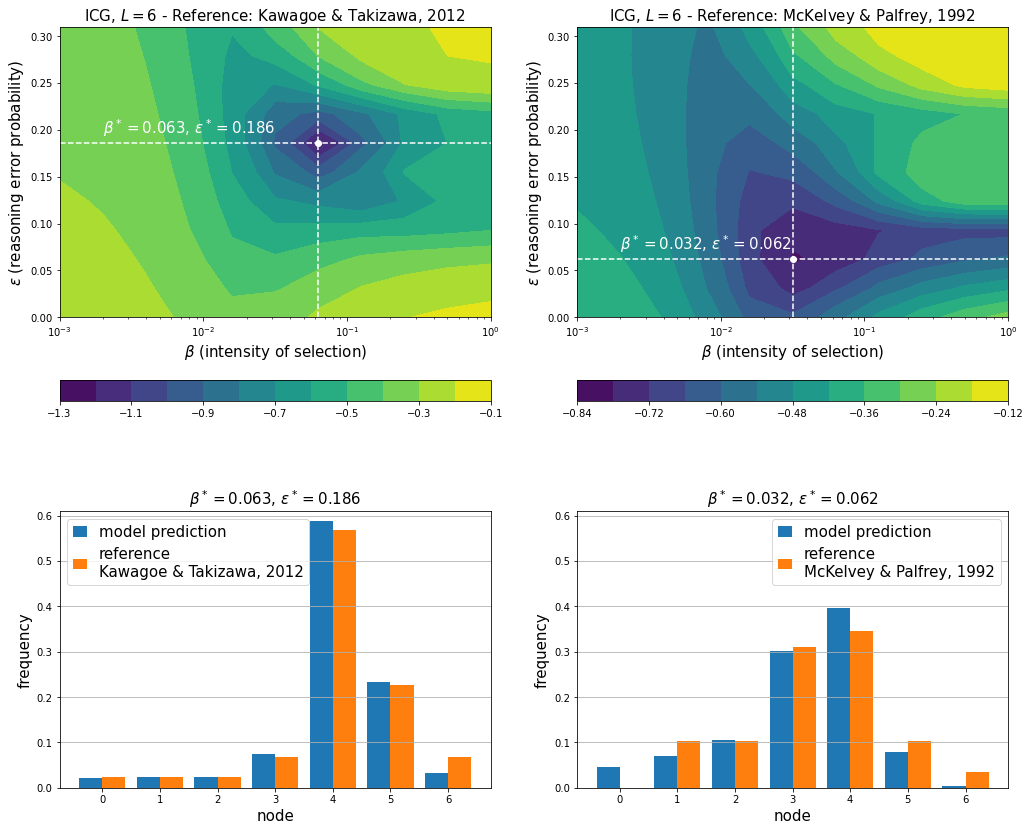

In [5]:
nb_steps = 6
refs = ['Kawagoe & Takizawa, 2012', 'McKelvey & Palfrey, 1992']

fig, ax = plt.subplots(2,2, figsize=(17, 14), gridspec_kw={'height_ratios': [1.5, 1]})

X = [str(t) for t in range(nb_steps+1)]
X_axis = np.arange(len(X))

ax[0,0].set_title(r'ICG, $L=6$ - Reference: '+refs[0], fontsize=15)
ax[0,1].set_title(r'ICG, $L=6$ - Reference: '+refs[1], fontsize=15)


for n, ref in enumerate(['KT2012', 'MP1992']):
    file_name = f'./results/fig3-Z=100-nbstep={nb_steps}-ref{ref}.pkl'
    with open(file_name, 'rb') as f:
        res = load(f)
    beta_values = res['beta_values']
    eps_values = res['eps_values']
    js = res['js']
    best_fit=res['best_fit']
    beta_best_fit = res['beta_best_fit']
    eps_best_fit = res['eps_best_fit']
    experimental_reference = res['experimental_reference']
    
    tmp = ax[0,n].contourf(beta_values, eps_values, np.log10(js), cmap='viridis', levels=11)
    ax[0,n].plot(beta_best_fit, eps_best_fit, marker='o', color='white')
    ax[0,n].axhline(eps_best_fit, linestyle='--', color='white',)
    ax[0,n].axvline(beta_best_fit, linestyle='--', color='white',)
    ax[0,n].text(0.002, eps_best_fit+0.01, r'$\beta^*=$'+str(np.round(beta_best_fit,3))+r', $\epsilon^*=$'+str(np.round(eps_best_fit,3)), color='white', fontsize=15)
    ax[0,n].set_xscale('log')
    #ax[0,n].set_yscale('log')
    ax[0,n].set_xlabel(r'$\beta$ (intensity of selection)', fontsize=15)
    ax[0,n].set_ylabel(r'$\epsilon$ (reasoning error probability)', fontsize=15)
    fig.colorbar(tmp, ax=ax[0,n], location='bottom')


    ax[1,n].grid(axis='y')
    ax[1,n].bar(X_axis - 0.2, best_fit, 0.4, label ='model prediction')
    ax[1,n].bar(X_axis + 0.2, experimental_reference, 0.4, label = 'reference\n'+refs[n])
    ax[1,n].set_xticks(X_axis, X)
    ax[1,n].set_xlabel('node', fontsize=15)
    ax[1,n].set_ylabel('frequency', fontsize=15)
    ax[1,n].set_ylim(0., .61)
    ax[1,n].legend(fontsize=15,handlelength=.9)
    
    ax[1,n].set_title(r'$\beta^*=$'+str(np.round(beta_best_fit,3))+r', $\epsilon^*=$'+str(np.round(eps_best_fit,3)), fontsize=15)
    
plt.savefig('./figures/icg6-fitting.png', format='png')
plt.show()